# Number Recognition Using SVM


## Data Understanding 

Let's first understand the shape, attributes etc. of the dataset.

In [84]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

# dataset
numbers = pd.read_csv("train.csv")

In [85]:
# about the dataset

# dimensions
print("Dimensions: ", numbers.shape, "\n")

# data types
print(numbers.info())

# head
numbers.head(50)

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# getting the column info
print(numbers.columns)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [87]:
order = list(np.sort(numbers['label'].unique()))
print(order)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


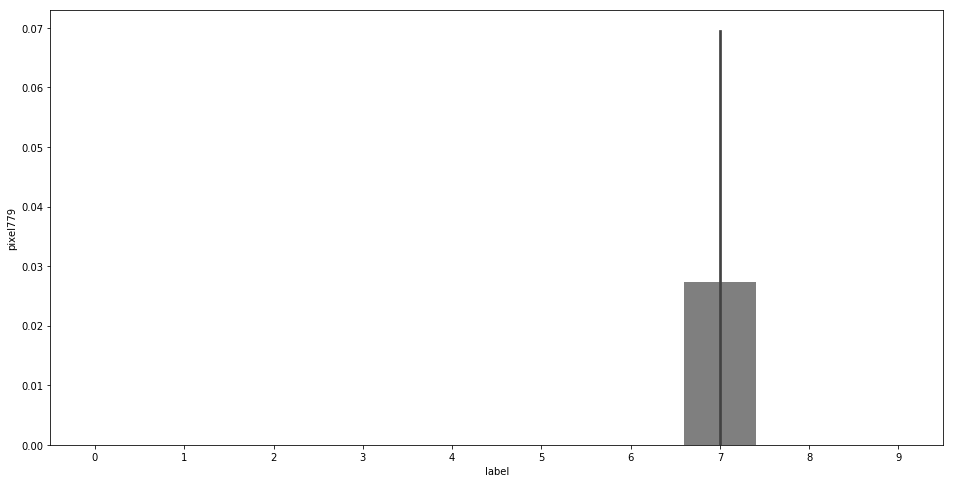

In [88]:
# basic plots: How do various attributes vary with the numbers

plt.figure(figsize=(16, 8))
sns.barplot(x='label', y='pixel779', 
            data=numbers, 
            order=order)

In [89]:
number_means = numbers.groupby('label').mean()
number_means.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


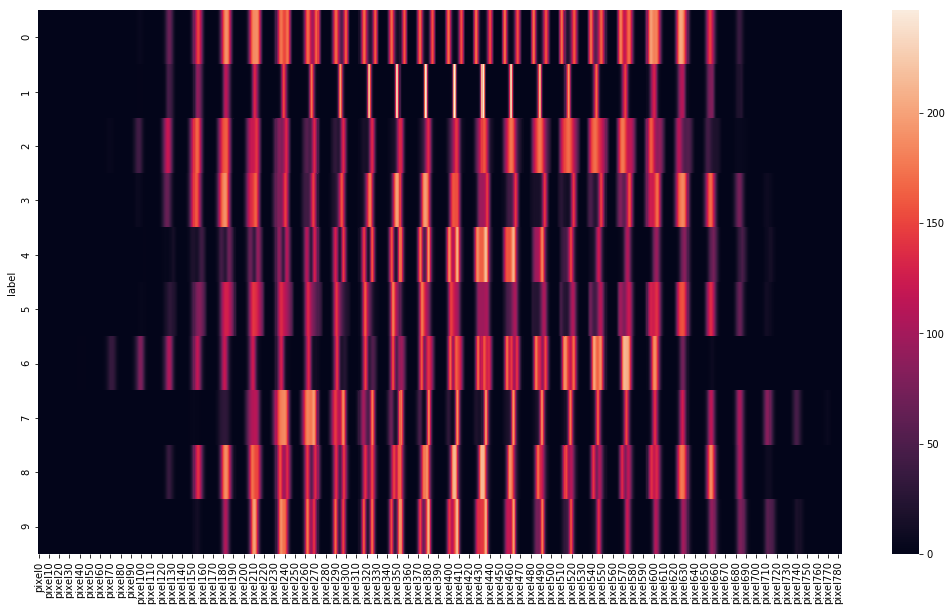

In [90]:
#plotting a heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(number_means)

# So Cant get any meaningfull insight from this heatmap

## Data Preparation

Let's conduct some data preparation steps before modeling. Firstly, let's see if it is important to **rescale** the features, since they may have varying ranges. For example, here are the average values:

In [91]:
# average feature values
round(numbers.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In [92]:
# getting the subset from train set as instructed in the problem statement.
#=numbers.head(int(len(numbers)*(20/100)))

# I  got 0.94 accuracy on kaggel using starting 20% of data so decided to use random 40% data to train my model
number_subset=numbers.sample(frac=0.4,random_state=1)

In [93]:
#getting the shape of subset data
number_subset.shape

(16800, 785)

In [94]:
number_subset.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
29633      1       0       0       0       0       0       0       0       0   
345        5       0       0       0       0       0       0       0       0   
36369      2       0       0       0       0       0       0       0       0   
16624      8       0       0       0       0       0       0       0       0   
14389      4       0       0       0       0       0       0       0       0   
21285      4       0       0       0       0       0       0       0       0   
5936       0       0       0       0       0       0       0       0       0   
9942       4       0       0       0       0       0       0       0       0   
41466      4       0       0       0       0       0       0       0       0   
27738      8       0       0       0       0       0       0       0       0   
6586       7       0       0       0       0       0       0       0       0   
26120     

In [95]:
# checking whether in my train data all the letters are availabel or not
norder = list(np.sort(number_subset['label'].unique()))
print(norder)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In this case, the average values do not vary a lot (e.g. having a diff of an order of magnitude). Nevertheless, it is better to rescale them.

In [102]:
# splitting into X and y
X = number_subset.drop("label", axis = 1)
y_train = number_subset['label']

In [103]:
# scaling the features
X_train = scale(X)

# train test split
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [98]:
#making test dataset
test_numbers = pd.read_csv("test.csv")

In [99]:
test_numbers.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X_test=test_numbers

## Model Building

Let's fist build two basic models - linear and non-linear with default hyperparameters.

In [104]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
#y_pred = model_linear.predict(X_test)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
#y_pred = non_linear_model.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [106]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)



In [107]:
# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs=-1 )      

# fit the model
model_cv.fit(X_train, y_train)                  



Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 128.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 152.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [108]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,615.373319,437.799815,50.252866,4.559128,1,0.01,"{'C': 1, 'gamma': 0.01}",0.774107,0.790179,0.780655,...,0.783393,0.006595,12,0.999777,0.999926,1.000000,0.999926,0.999926,0.999911,0.000073
1,716.267890,511.885243,28.181283,0.230099,1,0.001,"{'C': 1, 'gamma': 0.001}",0.944940,0.945238,0.944048,...,0.944107,0.001151,4,0.976935,0.975744,0.975670,0.975670,0.976860,0.976176,0.000590
2,121.950668,6.682397,35.701549,0.886251,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.912798,0.920238,0.917857,...,0.916667,0.002518,8,0.928199,0.926414,0.928348,0.928274,0.927827,0.927812,0.000722
3,1329.490076,1144.971997,232.437567,366.841581,10,0.01,"{'C': 10, 'gamma': 0.01}",0.790774,0.804464,0.796429,...,0.798750,0.005992,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,73.068269,2.272700,25.414645,1.775140,10,0.001,"{'C': 10, 'gamma': 0.001}",0.952083,0.957738,0.949107,...,0.953155,0.002783,1,0.998884,0.998958,0.999330,0.998958,0.999330,0.999092,0.000196
5,53.632943,2.815637,20.874714,0.569768,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.936607,0.940774,0.936012,...,0.937143,0.001886,6,0.963244,0.961607,0.962574,0.963095,0.963021,0.962708,0.000594
6,418.901797,8.290708,50.137126,0.807025,100,0.01,"{'C': 100, 'gamma': 0.01}",0.790774,0.804464,0.796429,...,0.798750,0.005992,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,69.133358,0.964547,22.915352,1.022065,100,0.001,"{'C': 100, 'gamma': 0.001}",0.952381,0.956250,0.946726,...,0.952262,0.003108,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,40.248491,0.188292,17.384420,0.269185,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.940476,0.942560,0.934524,...,0.938631,0.002750,5,0.990848,0.990476,0.990848,0.991071,0.990848,0.990818,0.000192
9,438.948029,22.600151,52.971718,3.537098,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.790774,0.804464,0.796429,...,0.798750,0.005992,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Let's now choose the best hyperparameters. 

In [109]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best train score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best train score is 0.9531547619047619 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [110]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [111]:
#scale test data
X_test=scale(X_test)

In [112]:
y_pred = model.predict(X_test)

In [113]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
ImageId=test_numbers.index+1

In [115]:
out_df = pd.DataFrame({'ImageId': ImageId, 'Label': y_pred})

In [116]:
out_df.to_csv('./output_predicted_number4.csv', sep=",",index=False)
# After submitting on kaggle, Got .9410 accuracy.. which seems fine.
# i got 0.96 accuracy after taking 40%  random samples of original training data.